<a href="https://colab.research.google.com/github/PhamHuuThoai/ML_2023_TV201/blob/main/Project_MayHoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Máy Học**

---
CSV : Air Quality

--
Description :Chứa các phản hồi của thiết bị đa cảm biến khí được triển khai trên thực địa tại một thành phố của Ý

Goal : Dự đoán nhiệt độ trong ngày từ chất lượng không khí


> Project by Phạm Hữu Thoại và Vũ Khắc Tạo






# **Import thư viện**

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/TH8'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/TH8


In [2]:
dataset = pd.read_csv('AirQuality.csv', delimiter=';', encoding='utf-8')
data_pro = dataset[0:200]
data_vip = dataset[0:2000]
data_pro.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## *Sơ chế dữ liệu*

---
Chuẩn hóa lại kiểu dữ liệu ở tập csv


In [3]:
data_pro['Date'] = pd.to_datetime(data_pro['Date'])
features=['CO(GT)','C6H6(GT)','NO2(GT)','T','RH','AH']
data_pro['RH'] = data_pro['RH'].apply(lambda x: float(x.replace(',', '.')))
data_pro['AH'] = data_pro['AH'].apply(lambda x: float(x.replace(',', '.')))
data_pro['T'] = data_pro['T'].apply(lambda x: float(x.replace(',', '.')))
data_pro['CO(GT)'] = data_pro['CO(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_pro['C6H6(GT)'] = data_pro['C6H6(GT)'].apply(lambda x: float(x.replace(',', '.')))
# data['NO2(GT)'] = data['NO2(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_pro[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']] = data_pro[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']].astype(int)

data_vip['Date'] = pd.to_datetime(data_vip['Date'])
features=['CO(GT)','C6H6(GT)','NO2(GT)','T','RH','AH']
data_vip['RH'] = data_vip['RH'].apply(lambda x: float(x.replace(',', '.')))
data_vip['AH'] = data_vip['AH'].apply(lambda x: float(x.replace(',', '.')))
data_vip['T'] = data_vip['T'].apply(lambda x: float(x.replace(',', '.')))
data_vip['CO(GT)'] = data_vip['CO(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_vip['C6H6(GT)'] = data_vip['C6H6(GT)'].apply(lambda x: float(x.replace(',', '.')))
# data['NO2(GT)'] = data['NO2(GT)'].apply(lambda x: float(x.replace(',', '.')))
data_vip[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']] = data_vip[['T', 'RH','AH','CO(GT)','C6H6(GT)','NO2(GT)']].astype(int)


<ipython-input-3-adc4b797ad7e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_pro['Date'] = pd.to_datetime(data_pro['Date'])
<ipython-input-3-adc4b797ad7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pro['Date'] = pd.to_datetime(data_pro['Date'])
<ipython-input-3-adc4b797ad7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pro['RH'] = data_

In [4]:
data_pro.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


# ***Column***

0 Ngày (DD/MM/YYYY)

1 Thời gian (HH.MM.SS)

2 Nồng độ CO trung bình thực hàng giờ tính bằng mg/m^3 (máy phân tích tham chiếu)

3 Phản ứng cảm biến trung bình hàng giờ PT08.S1 (thiếc oxit) (nhắm mục tiêu CO trên danh nghĩa )

4 Nồng độ HydroCarbon Non Metanic tổng thể trung bình thực tính bằng microg/m^3 (máy phân tích tham chiếu)

5 Nồng độ Benzen trung bình thực trung bình hàng giờ tính bằng microg/m^3 (máy phân tích tham chiếu)

6 PT08.S2 (titania) Độ phản hồi của cảm biến trung bình mỗi giờ (trên danh nghĩa là NMHC được nhắm mục tiêu)

7 Nồng độ NOx trung bình thực theo giờ tính bằng ppb (máy phân tích tham chiếu)

8 PT08.S3 (oxit vonfram) Phản ứng cảm biến trung bình theo giờ (nhắm mục tiêu NOx trên danh nghĩa)

9 Nồng độ NO2 trung bình thực theo giờ tính bằng microg/m^3 (máy phân tích tham chiếu)

10 PT08.S4 (vonfram oxit) phản ứng trung bình hàng giờ của cảm biến (trên danh nghĩa là NO2)

11 PT08.S5 (indium oxide) phản ứng của cảm biến hàng giờ (trên danh nghĩa là O3)

12 Nhiệt độ tính bằng °C

13 Độ ẩm tương đối (%)

14 AH Độ ẩm tuyệt đối

 








# Thăm dò dữ liệu

In [5]:
data_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           200 non-null    datetime64[ns]
 1   Time           200 non-null    object        
 2   CO(GT)         200 non-null    int64         
 3   PT08.S1(CO)    200 non-null    float64       
 4   NMHC(GT)       200 non-null    float64       
 5   C6H6(GT)       200 non-null    int64         
 6   PT08.S2(NMHC)  200 non-null    float64       
 7   NOx(GT)        200 non-null    float64       
 8   PT08.S3(NOx)   200 non-null    float64       
 9   NO2(GT)        200 non-null    int64         
 10  PT08.S4(NO2)   200 non-null    float64       
 11  PT08.S5(O3)    200 non-null    float64       
 12  T              200 non-null    int64         
 13  RH             200 non-null    int64         
 14  AH             200 non-null    int64         
 15  Unnamed: 15    0 non-nu

## *Biểu đô hiển thị Nhiệt độ và Độ ẩm'*

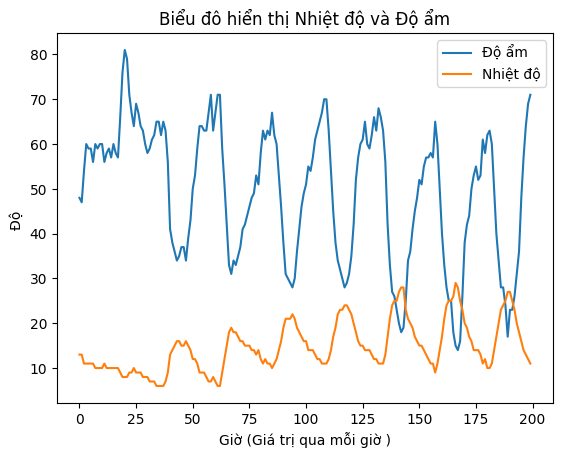

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(data_pro['RH'],  label="sine")
plt.title('Biểu đô hiển thị Nhiệt độ và Độ ẩm')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('Độ ')
plt.plot(data_pro['T'])
plt.legend(('Độ ẩm','Nhiệt độ'))
plt.show()

## *Biểu đô hiển thị nồng độ indium oxide*

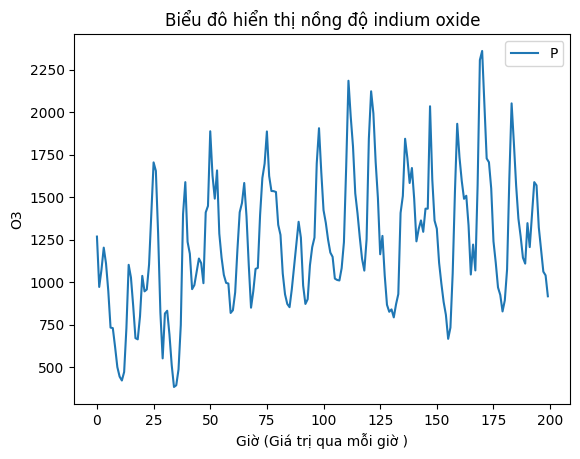

In [7]:
plt.title('Biểu đô hiển thị nồng độ indium oxide')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('O3')
plt.plot(data_pro['PT08.S5(O3)'])
plt.legend(('PT08.S5(O3)'))
plt.show()

## *Biểu đồ oxit vonfram*

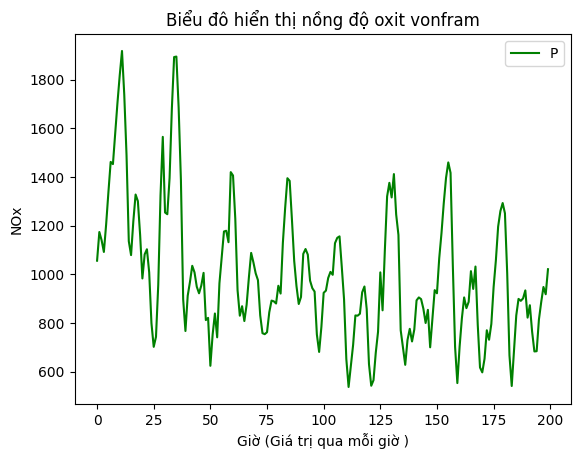

In [8]:
plt.title('Biểu đô hiển thị nồng độ oxit vonfram')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('NOx')
plt.plot(data_pro['PT08.S3(NOx)'],'g')
plt.legend(('PT08.S3(NOx)'))
plt.show()

## *Biểu đồ titania*

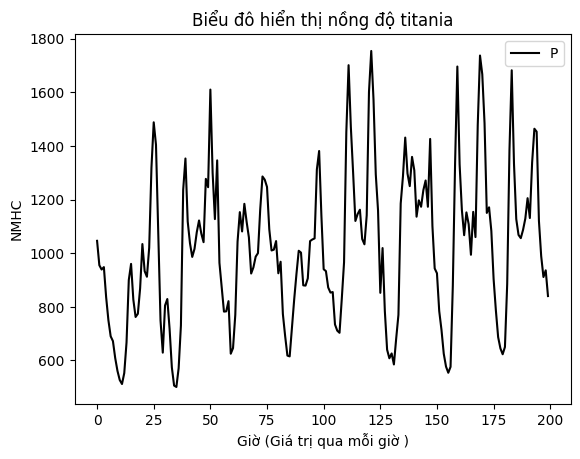

In [9]:
plt.title('Biểu đô hiển thị nồng độ titania')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('NMHC')
plt.plot(data_pro['PT08.S2(NMHC)'],'k')
plt.legend(('PT08.S2(NMHC)'))
plt.show()

## *Biểu đồ thiếc oxit*

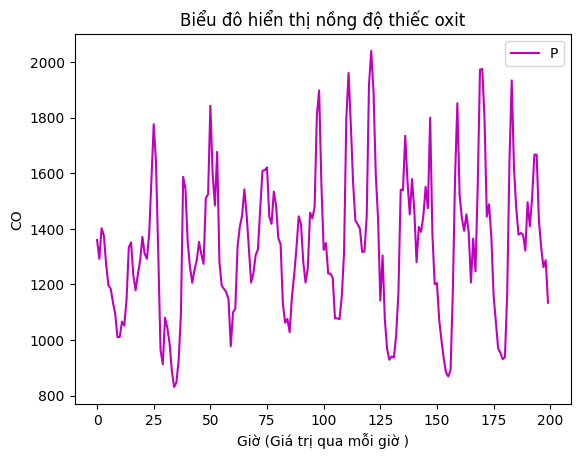

In [10]:

plt.title('Biểu đô hiển thị nồng độ thiếc oxit')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('CO')
plt.plot(data_pro['PT08.S1(CO)'],'m')
plt.legend(('PT08.S1(CO)'))
plt.show()


## *Biểu đô hiển thị nồng độ khí CO ,NMHC,NOx,C6H6,NO2*

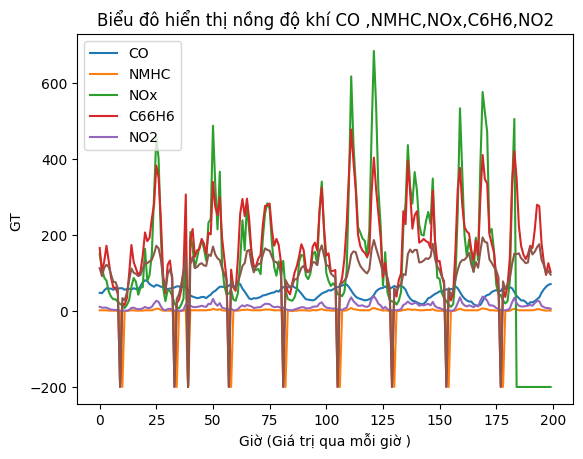

In [11]:
plt.plot(data_pro['RH'],  label="sine")
plt.title('Biểu đô hiển thị nồng độ khí CO ,NMHC,NOx,C6H6,NO2')
plt.xlabel('Giờ (Giá trị qua mỗi giờ )')
plt.ylabel('GT ')
plt.plot(data_pro['CO(GT)'])
plt.plot(data_pro['NMHC(GT)'])
plt.plot(data_pro['NOx(GT)'])
plt.plot(data_pro['C6H6(GT)'])
plt.plot(data_pro['NO2(GT)'])
plt.legend(('CO','NMHC','NOx','C66H6','NO2'))
plt.show()

Trích chọn đặc trưng

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
features=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'RH', 'AH']
X = data_vip[features]
y = data_vip['T']
X_train , X_test , y_train , y_test =train_test_split(X,y, train_size=0.8, test_size=0.2, random_state = 1 )

# Xây dựng và đánh giá mô hình

---

Lấy dữ liệu từ data_vip

Tách dữ liệu thành biến input X và output y

X gồm các biến đầu vào định lượng và định tính (12 đặc trưng)
y là biến cột T

Phân chia dữ liệu thành 2 tập: Training Set (80%) và Test Set (20%). 

Khởi tạo mô hình, nhận thuật toán phân lớp thông qua thư viện
Đánh giá mô hình bằng Kiểm chứng chéo (Cross Validation) trên Training Set

Đánh giá 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1.


Kiểm chứng chéo mô hình trên Training Set,

Huấn luyện mô hình và dùng mô hình dự đoán trên Test Set
Đánh giá kết quả dự đoán của mô hình trên Test Set
Đánh giá 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1.

Trực quan hóa kết quả đánh giá
Vẽ biểu đồ hộp cho 4 hệ số đánh giá từ kết quả kiểm chứng chéo Training Set.
Vẽ Confusion Matrix cho kết quả dự đoán của mô hình trên Test Set.

# ***Neural Network***


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Load data
data = data_vip[1:2000]

# Xử lý dữ liệu
data = data.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1)
data = data.dropna()

# chia dữ liệu
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# xây dựng model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
#số lượng đặc trưng (features)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=2000, batch_size=32,verbose=1)



Epoch 1/2000
50/50 [==============================] - 1s 1ms/step - loss: 812.1890
Epoch 2/2000
50/50 [==============================] - 0s 2ms/step - loss: 635.6930
Epoch 3/2000
50/50 [==============================] - 0s 2ms/step - loss: 372.6035
Epoch 4/2000
50/50 [==============================] - 0s 2ms/step - loss: 96.1840
Epoch 5/2000
50/50 [==============================] - 0s 1ms/step - loss: 3.7876
Epoch 6/2000
50/50 [==============================] - 0s 2ms/step - loss: 0.4638
Epoch 7/2000
50/50 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 8/2000
50/50 [==============================] - 0s 2ms/step - loss: 0.2071
Epoch 9/2000
50/50 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 10/2000
50/50 [==============================] - 0s 2ms/step - loss: 0.1616
Epoch 11/2000
50/50 [==============================] - 0s 2ms/step - loss: 0.1522
Epoch 12/2000
50/50 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 13/2000
50/5

In [30]:
# In thông tin về mô hình
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                832       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


# ***Decision Tree***

In [ ]:

# features=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
#        'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
#        'PT08.S5(O3)', 'RH', 'AH']
# X = data_pro[features]
# y = data_pro['T']

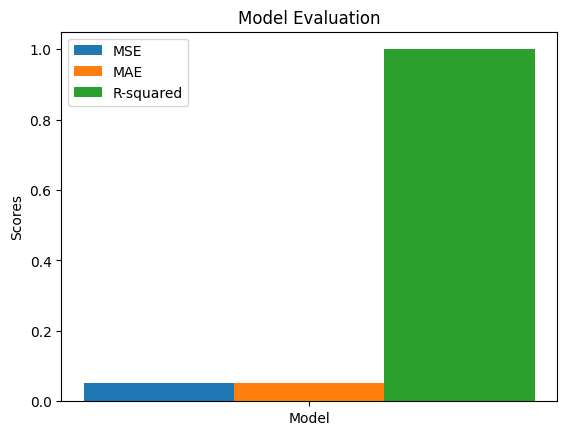

Mean Squared Error: 0.0525
Mean Absolute Error: 0.0525
R-squared: 0.9999114638279778


In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

X_train , X_test , y_train , y_test =train_test_split(X , y, train_size=0.8, test_size=0.2, random_state = 0 )
# Build Decision Tree Classifier model
model = DecisionTreeRegressor()




model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
labels = ['Model']
# Tạo biểu đồ
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mse, width, label='MSE')
rects2 = ax.bar(x, mae, width, label='MAE')
rects3 = ax.bar(x + width, r2, width, label='R-squared')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị biểu đồ
plt.show()
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


# **Mô hình RandomForest**

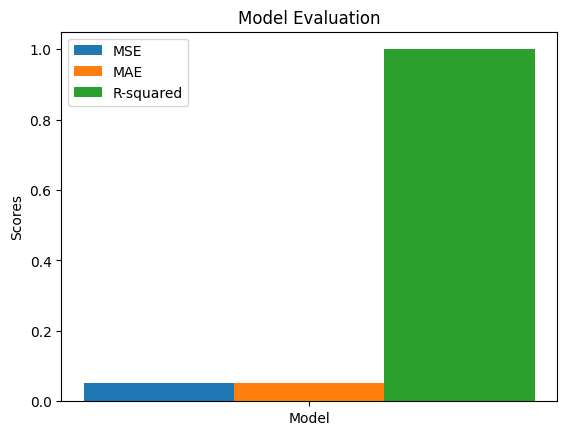

Mean Squared Error: 0.0525
Mean Absolute Error: 0.0525
R-squared: 0.9999114638279778


In [32]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(random_state=1)

random.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

labels = ['Model']
# Tạo biểu đồ
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mse, width, label='MSE')
rects2 = ax.bar(x, mae, width, label='MAE')
rects3 = ax.bar(x + width, r2, width, label='R-squared')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị biểu đồ
plt.show()
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


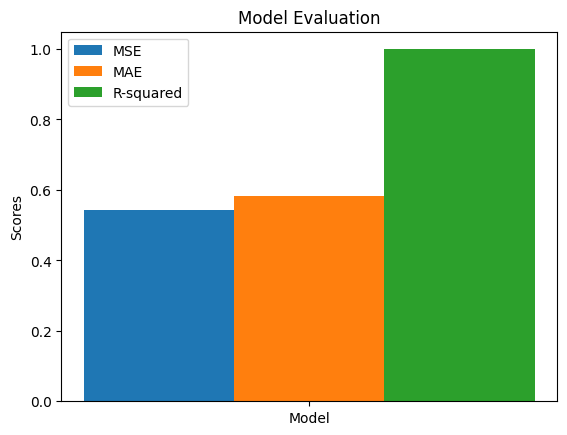

Mean Squared Error: 0.5416196959651393
Mean Absolute Error: 0.5831672809964409
R-squared: 0.9990866107700457


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)
# Đánh giá mô hình
y_pred = model.predict(X_test)
# Đánh giá kết quả dự đoán của mô hình trên Test Set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
labels = ['Model']
# Tạo biểu đồ
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mse, width, label='MSE')
rects2 = ax.bar(x, mae, width, label='MAE')
rects3 = ax.bar(x + width, r2, width, label='R-squared')

# Thêm tiêu đề và chú thích
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị biểu đồ
plt.show()
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)